### 問題：是否有心血管疾病(Healthy:Yes/No)
### 特徵：年齡(Age)、性別(Sex:Male/Female)、BMI、有無抽菸喝酒等不良嗜好(Bad Habit:Yes/No)
### 規則：1.年齡越高患病機率越高 2.BMI越高患病機率越高 3.有不良嗜好患病機率越高 4.有不良嗜好且超過50歲一定患病

#### 假設之數據中有加入一些雜訊，以模擬實際狀況

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO   
from sklearn.tree import export_graphviz
import pydotplus

In [2]:
df=pd.read_csv('data.csv')
print(df.head())

sex_map={'Male':0, 'Female':1}
YN_map = {'No':0, 'Yes':1}
df['Sex']=df['Sex'].map(sex_map)
df['Healthy']=df['Healthy'].map(YN_map)
df['Bad Habit']=df['Bad Habit'].map(YN_map)

  Healthy  Age     Sex        BMI Bad Habit
0     Yes   25    Male  21.013379       Yes
1      No   42  Female  28.988226       Yes
2      No   46  Female  33.655840        No
3     Yes   27  Female  18.322614        No
4     Yes   67    Male  22.360735        No


In [3]:
df_train=df[:200]
df_test=df[200:]

In [4]:
train_ans=df_train['Healthy'].values
df_train=df_train.drop('Healthy', 1)

In [5]:
dtree=DecisionTreeClassifier(max_depth=4, min_samples_split=10)
dtree.fit(df_train, train_ans)

dot_data=StringIO()
export_graphviz(dtree, 
                out_file=dot_data,  
                filled=True, 
                feature_names=list(df_train),
                class_names=['Unhealthy', 'Healthy'],
                special_characters=True)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("tree.pdf")

True

In [6]:
print(dtree.feature_importances_)

test_ans=df_test['Healthy'].values
df_test=df_test.drop('Healthy', 1)

predict=dtree.predict(df_test)

[0.29898049 0.         0.4375899  0.26342961]


In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(test_ans, predict)

0.84

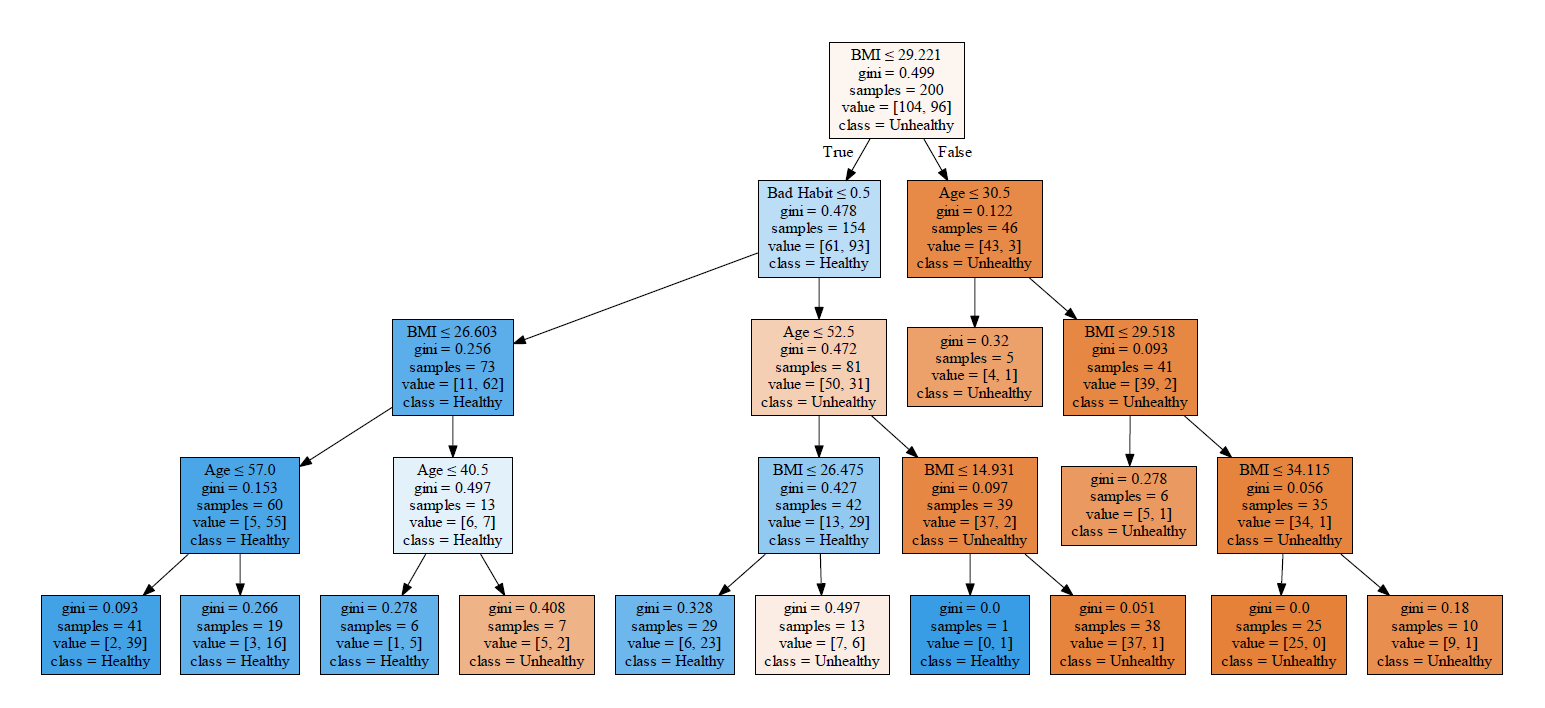

### Report
#### 在產生數據時都是依據年齡、BMI及有無不良嗜好這3項去設定，而這點也可從特徵重要性發現：性別所佔重要性為0，而BMI又較另外2項來得高。
#### 規則方面，由於前2項規則是依據機率實行，並無一個準確的閥值，所以分析上會有一定的誤差；而第3項也是準確的，不會因為資料中的少許雜訊而影響分析結果。
#### 最後測試由分析得到的決策樹，準確率有84%，是可以接受的準確率。